# Whatsapp Chat Analyser

## Reading Chat

In [1]:
import pandas as pd

In [2]:
import read_chat_DM
data = read_chat_DM.getMessages("data/chat.txt")
data.head()

,Date,Time,Name,Message
0,2014-09-07,22:57:00,BD,Yo yo
1,2014-10-16,23:02:00,BD,Dude one help pro
2,2014-10-17,17:24:00,sony,dude going tmrw is a waste of time
3,2014-10-17,16:08:00,BD,Yyyyyy u tell me please why aren't u not coming
4,2014-10-17,22:28:00,sony,what doing


## Basic exploratory analysis

### Checking for null values 

In [3]:
data[data.isnull().any(1)]

,Date,Time,Name,Message


Found out that Name can have null in encryption key message so fixed it in preprocessing lib

    ex: 4/6/16, 7:00 AM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.


### Basic chat insights 

In [4]:
print("-------------------------------- Basic EDA -------------------------------------")

total_messages = data.shape[0]
print("Total messages :\t"+str(total_messages))

parties_involved = data['Name'].unique()
print("Parties involved :\t"+str(parties_involved))

print("--------------------------------------------------------------------------------")

for i in parties_involved:
    print("%s \t sent \t %d messages "%(i,data[data['Name'] == i].shape[0]))

print("--------------------------------------------------------------------------------")

print("Frist intraction: ")

print("By \t\t: " + data.iloc[0]['Name'])
print("On \t\t: " + str(data.iloc[0]['Date']))
print("Message \t: " + data.iloc[0]['Message'])

print("--------------------------------------------------------------------------------")

total_number_of_days = (data["Date"].max() - data["Date"].min()).days + 1
print ("Total number of days : " + str(total_number_of_days))
print ("Avg. messages per day :" +  str(total_messages/total_number_of_days))

print("--------------------------------------------------------------------------------")

-------------------------------- Basic EDA -------------------------------------
Total messages :	6263
Parties involved :	['BD' 'sony']
--------------------------------------------------------------------------------
BD 	 sent 	 3785 messages 
sony 	 sent 	 2478 messages 
--------------------------------------------------------------------------------
Frist intraction: 
By 		: BD
On 		: 2014-09-07 00:00:00
Message 	: Yo yo
--------------------------------------------------------------------------------
Total number of days : 2577
Avg. messages per day :2.4303453628249905
--------------------------------------------------------------------------------


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

data["Year"] = data["Date"].apply(lambda x: x.year)

data["Month"] = data["Date"].apply(lambda x: x.strftime("%b"))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['Month'] = pd.Categorical(data['Month'], months)

data["Day"] = data["Date"].apply(lambda x: x.strftime('%a'))
day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
data['Day'] = pd.Categorical(data['Day'], day_of_week)
data.head()

,Date,Time,Name,Message,year,month,day_of_week
0,2014-09-07,22:57:00,BD,Yo yo,2014,Sep,Sun
1,2014-10-16,23:02:00,BD,Dude one help pro,2014,Oct,Thu
2,2014-10-17,17:24:00,sony,dude going tmrw is a waste of time,2014,Oct,Fri
3,2014-10-17,16:08:00,BD,Yyyyyy u tell me please why aren't u not coming,2014,Oct,Fri
4,2014-10-17,22:28:00,sony,what doing,2014,Oct,Fri


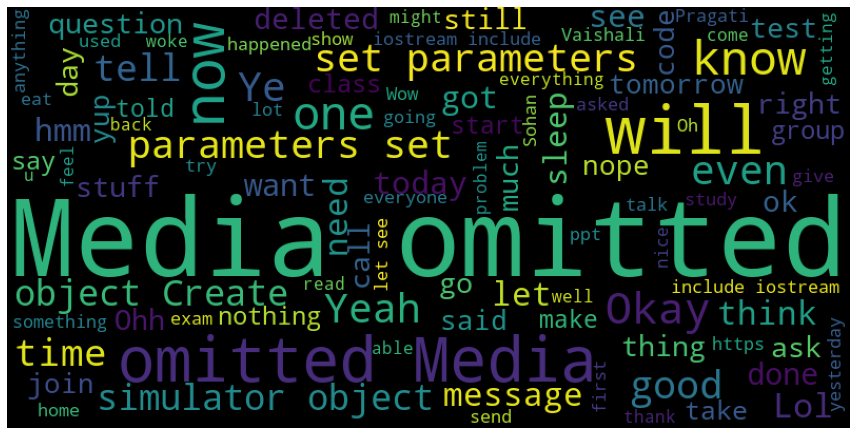

In [23]:
!pip install wordcloud
from wordcloud import WordCloud

def wordcloud_(content, title="", generate_from_frequencies=False, mask=None, background_color='black'):
    wordcloud = WordCloud(background_color=background_color,
#                           stopwords = set(STOPWORDS),
                          max_words = 100,
                          max_font_size = 200,
#                           random_state = 4,
                          height=400, width=800,
                          prefer_horizontal=0.9,
                          relative_scaling=0.6,
                          mask=mask
                     )
    
    if (generate_from_frequencies):
        wordcloud.generate_from_frequencies(frequencies=content)
    else:
        wordcloud.generate(content)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.title(title, fontdict={'size': 40})
    plt.axis('off');
    plt.tight_layout()

text = ' '.join(data["Message"].values)
wordcloud_(text)